# Topic 5: Unsupervised Learning | Factor Analysis 
Factor Analysis is a statistical method used to identify patterns in dataset by reducing the number of variables that are used to describe the data set. To implement this the code in the first cell was provided. 

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
# style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis

def biplot(coeff,ax):
    for i in range(coeff.shape[1]):
        ax.arrow(0, 0, coeff[0,i], coeff[1,i], width=.01)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.grid()

Now we want to load the data into numpy by using panda. We define our FactorAnalysis with two components. Then we can get all interesting parameters. 

X correlation: [[0.99963966 0.55454491 0.41719278 0.38364411 0.54737798]
 [0.55454491 1.00020366 0.47662758 0.43927034 0.61060539]
 [0.41719278 0.47662758 0.99959242 0.60794113 0.70734272]
 [0.38364411 0.43927034 0.60794113 0.99983643 0.6586369 ]
 [0.54737798 0.61060539 0.70734272 0.6586369  1.00051498]]
Communalities: [0.52017191 0.5944025  0.65063325 0.56820117 0.80383447]
Uniquenesses: [0.47946776 0.40580116 0.34895917 0.43163526 0.19668052]
Variance explained by factors: [0.56380242 0.06364624]


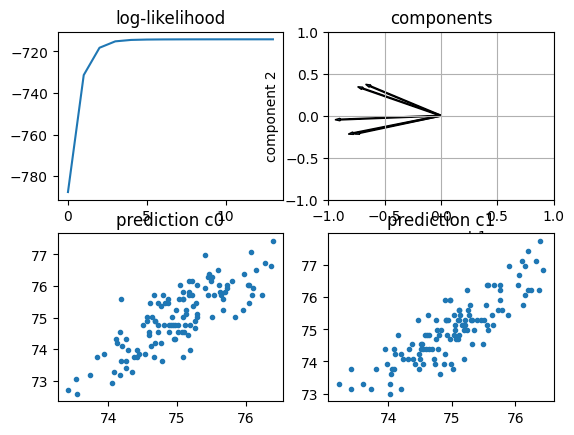

In [3]:
df = pd.read_csv("examgrades.csv")
X = df.to_numpy()

# preprocessing
mu = np.mean(X,0)
std = np.std(X,0)
X = (X-mu)/std

fa = FactorAnalysis(n_components=2,tol=1e-3)
fa.fit(X)
Lambda = fa.components_     
g = fa.transform(X)
Psi = np.diag(fa.noise_variance_)
llh = fa.loglike_
xpred = np.matmul(g,Lambda)


xCorr = np.matmul(Lambda.T,Lambda)+Psi
print("X correlation:",xCorr)

comm = np.sum(Lambda**2,0)
print("Communalities:",comm)

uniq = np.diag(Psi)
print("Uniquenesses:",uniq)

varExpl = np.sum(Lambda**2,1)/np.shape(X)[1]
print("Variance explained by factors:",varExpl)



fig, ax = plt.subplots(2,2)
ax[0,0].set_title('log-likelihood')
ax[0,0].plot(range(len(llh)),llh)
for i in range(2):
    ax[1,i].set_title('prediction c{}'.format(i))
    ax[1,i].scatter(xpred[:,i] + mu[i],X[:,i]+mu[i],marker='.')
ax[0,1].set_title('components')
biplot(Lambda,ax[0,1])
plt.show()
